# Multipliers in Digital Logic
Multiplication in digital logic is done by a combinational circuit called array multiplier. The array multiplier is used for multiplying two binary numbers by employing a array of full and half adders.

Now let's look at a simple example of multilication between two binary numbers A=a1a0 and B=b1b0
1.P0 = a0b0
2.P1 = a1b0 + b1a0
3.P2 = a1b1 + c1 where c1 is the carry from the addition in P1
4.P3 = c2 where c2 is the carry term from the addition in P2

For the above multiplication we need two kind of operations. 
-AND gates are needed to calculate the products seen in P0,P1,P2
-Adder arrays are needed to calculate the sum of these products

## Circuit implementation

![![image.png](https://media.geeksforgeeks.org/wp-content/uploads/20191217174410/2-bit-by-2-bit-array-multiplier.jpg)](attachment:image.png)

Where HA is a Half-Adder array.


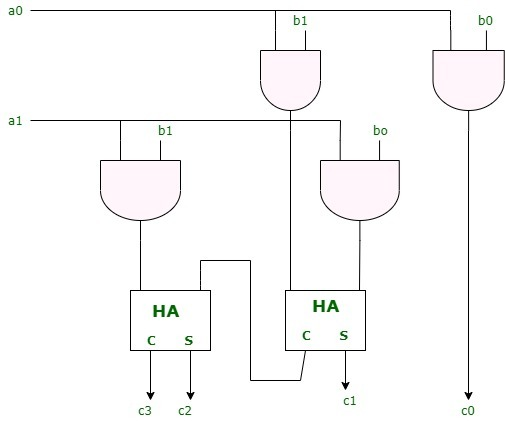

# Quantum Fourier Transform multiplier
In Quantum Computers there are various ways to perform arithmetic operations on binary numbers. One of these ways in the Quantum Fourier Transform multiplier circuit which was introduced by Lidia Ruiz-Perez and Juan Garcia-Escartin in their paper Quantum arithemetic with the Quantum Fourier Transform (https://arxiv.org/pdf/1411.5949.pdf).

The circuit works by applying the Quantum Fourier Transform (QFT) on the output register and a seriers of controlled rotations based on the two input registers. The end state will correspond to the product of the two n-bit numbers. 

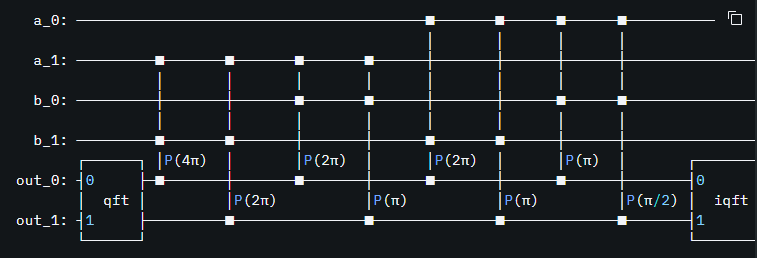

Now in order to implement the multiplier for operands with n bits we will need:
-n qubits to store operand A
-n qubits to store operand B
-And an unknown amount of qubits to store the result.

Now we can use the same method used in the drapers_adder to initially read the two operands and calculate the number of qubits based on the binary numbers required to express them.
We will then apply the circuit we see below and read the results. 

One downside of the circuit below is that the two integers A and B must have the same bit size.

Number of qubits for integer_a: 4
Number of qubits for integer_b: 4
Number of qubits for the product: 8


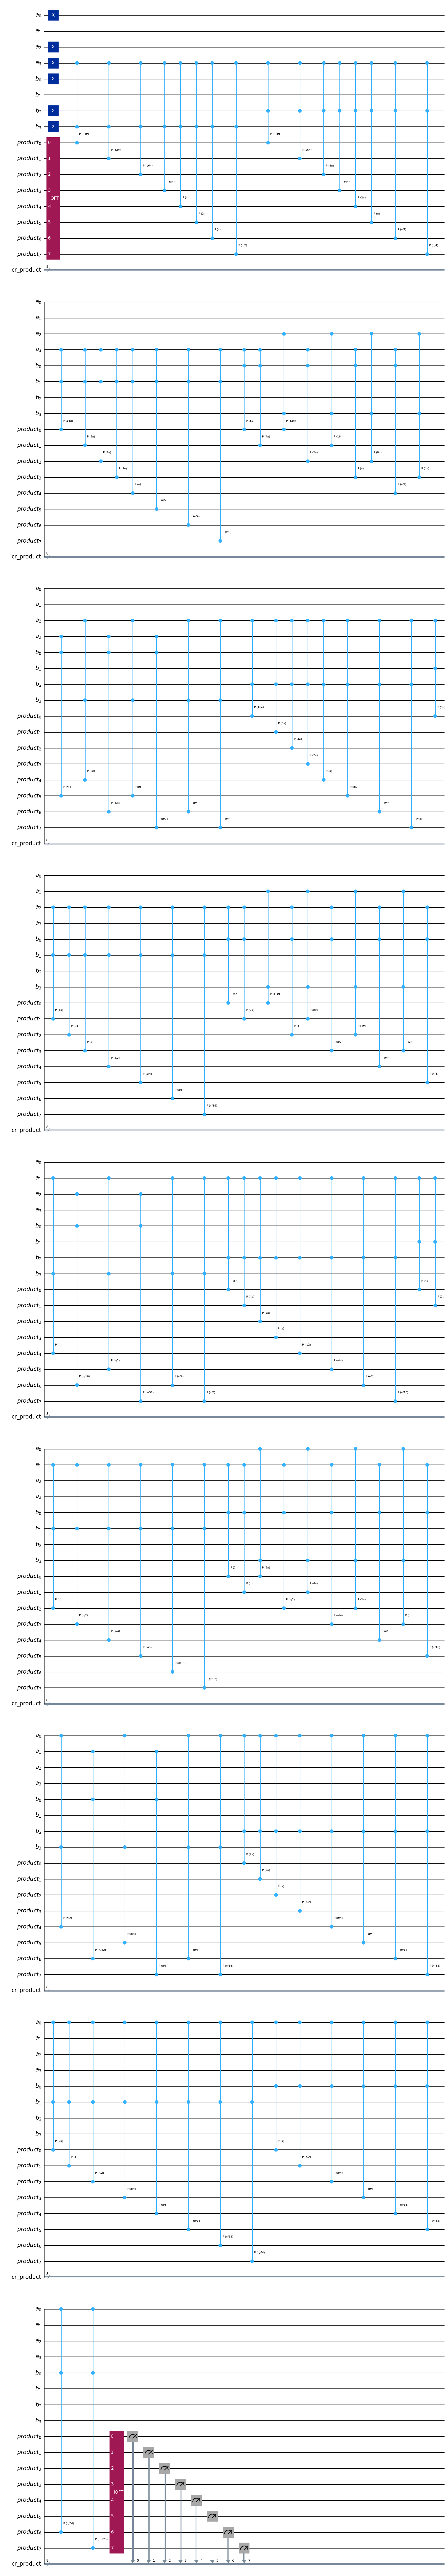

In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT, PhaseGate
import numpy as np
import matplotlib.pyplot as plt

# Define integers
integer_a = int(input("Insert the first integer: "))
integer_b = int(input("Insert the second integer: "))

# Determine bit lengths of the integers
num_qubits_a = integer_a.bit_length()  # Qubits needed for integer_a
num_qubits_b = integer_b.bit_length()  # Qubits needed for integer_b
num_qubits_product = num_qubits_a + num_qubits_b  # Qubits needed for the product

print(f"Number of qubits for integer_a: {num_qubits_a}")
print(f"Number of qubits for integer_b: {num_qubits_b}")
print(f"Number of qubits for the product: {num_qubits_product}")

# Define quantum registers
qr_a = QuantumRegister(num_qubits_a, "a")
qr_b = QuantumRegister(num_qubits_b, "b")
qr_product = QuantumRegister(num_qubits_product, "product")
cr_product = ClassicalRegister(num_qubits_product, "cr_product")
qc = QuantumCircuit(qr_a, qr_b, qr_product, cr_product)

# Initialize qubits based on binary representation of integer_a
binary_a = f'{integer_a:0{num_qubits_a}b}'
for i, bit in enumerate(reversed(binary_a)):
    if bit == '1':
        qc.x(qr_a[i])

# Initialize qubits based on binary representation of integer_b
binary_b = f'{integer_b:0{num_qubits_b}b}'
for i, bit in enumerate(reversed(binary_b)):
    if bit == '1':
        qc.x(qr_b[i])

# Apply the QFT on the qr_product
qft = QFT(num_qubits=num_qubits_product, do_swaps=False, inverse=False).to_gate()
qc.append(qft, qr_product[:])

# Apply controlled phase rotations
for j in range(1, num_qubits_a + 1):
            for i in range(1, num_qubits_a + 1):
                for k in range(1, num_qubits_product + 1):
                    lam = (2 * np.pi) / (2 ** (i + j + k - 2 * num_qubits_a))
                    qc.append(
                        PhaseGate(lam).control(2),
                        [qr_a[num_qubits_a - j], qr_b[num_qubits_a - i], qr_product[k - 1]],
                    )

inverse_qft = QFT(num_qubits=num_qubits_product, do_swaps=False, inverse=True).to_gate()
qc.append(inverse_qft, qr_product[:])

qc.measure(qr_product, cr_product)

qc.draw(output='mpl')

# Circuit Simulation

In [6]:
simulator = AerSimulator()
circ = transpile(qc, simulator)

result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts)

# Extract the most common measurement outcome
measured_binary = max(counts, key=counts.get)  # Get the most likely result
decimal_result = int(measured_binary, 2)

print("Binary Result:", measured_binary)
print("Decimal Result:", decimal_result)

Binary Result: 10101001
Decimal Result: 169
